Daniele Sasso and a few others made their dataset availible on Zenodo - [https://doi.org/10.5281/zenodo.14927602](https://doi.org/10.5281/zenodo.14927602) - daily webscraping data from different shops of an Italian supermarket chain.

Manually manually downloaded the dataset to `/data/bronze/` for a quick exploration

In [1]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## General EDA

In [63]:
# Load dataset
df = pd.read_csv("../data/bronze/Variations_Food_Prices_Italian_Supermarkets_raw.csv")

In [3]:
df.head()

,date,price,product_id,store_id,region,product,COICOP5,COICOP4
0,2020-12-03,1.99,2,2,calabria,arance navelina italia calibro 1.5 kg,Oranges,Fruit
1,2020-12-03,2.48,2,3,lazio,arance navelina italia calibro 1.5 kg,Oranges,Fruit
2,2020-12-03,2.49,2,4,calabria,arance navelina italia calibro 1.5 kg,Oranges,Fruit
3,2020-12-03,1.99,2,5,calabria,arance navelina italia calibro 1.5 kg,Oranges,Fruit
4,2020-12-03,2.49,2,8,lazio,arance navelina italia calibro 1.5 kg,Oranges,Fruit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4033211 entries, 0 to 4033210
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   price       float64
 2   product_id  int64  
 3   store_id    int64  
 4   region      object 
 5   product     object 
 6   COICOP5     object 
 7   COICOP4     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 246.2+ MB


## Geographic distribution of unique products by region

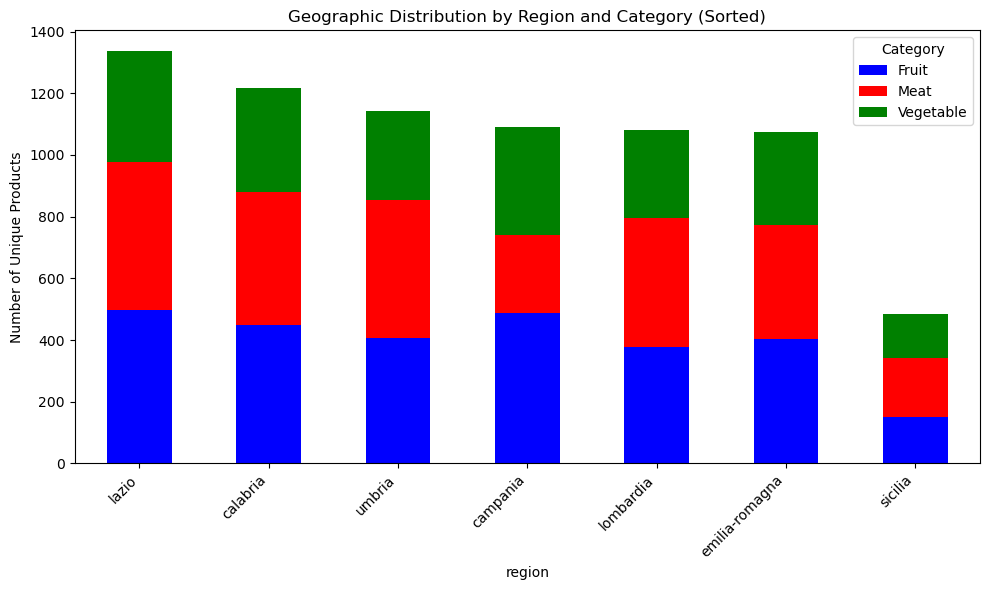

In [5]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])  # Format: YYYY-MM-DD

# Define category colors
category_colors = {"Fruit": "blue", "Vegetable": "green", "Meat": "red"}

geo = df.groupby(["region", "COICOP4"])["product_id"].nunique().reset_index()
pivot_geo = geo.pivot(index="region", columns="COICOP4", values="product_id").fillna(0)
pivot_geo["Total"] = pivot_geo.sum(axis=1)
pivot_geo = pivot_geo.sort_values("Total", ascending=False).drop(columns="Total")
pivot_geo = pivot_geo[["Fruit", "Meat", "Vegetable"]]

pivot_geo.plot(kind="bar", stacked=True, figsize=(10,6), color=["blue", "red", "green"])
plt.ylabel("Number of Unique Products")
plt.title("Geographic Distribution by Region and Category (Sorted)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

## Basic analysis: average price trend over time (by COICOP4)

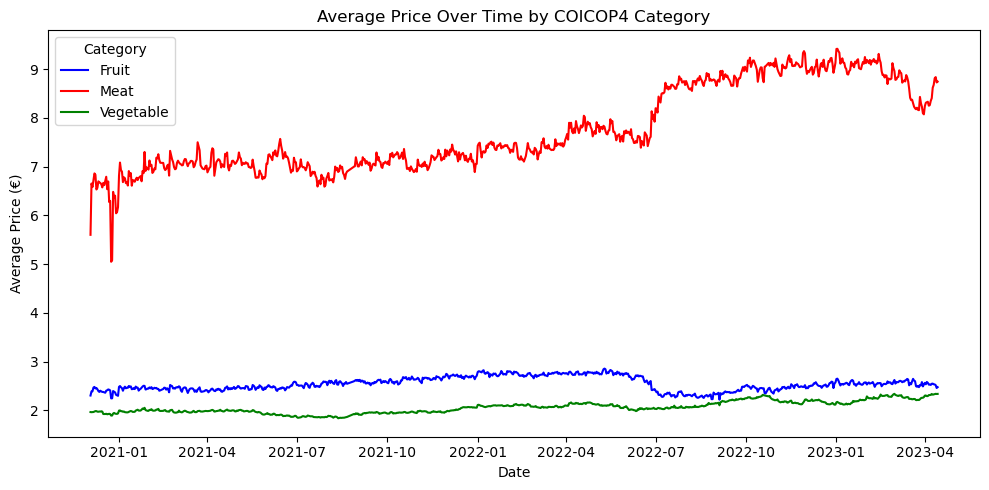

In [ ]:
price_trend = df.groupby(["date", "COICOP4"])["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=price_trend, x="date", y="price", hue="COICOP4", palette=category_colors)
plt.title("Average Price Over Time by COICOP4 Category")
plt.xlabel("Date")
plt.ylabel("Average Price (€)")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Other informative information about the dataset

First, check out the number of unique products

In [26]:
len(df['product'].value_counts())

2361

Number of stores

In [29]:
len(df['store_id'].value_counts())

20

Average number of products scraped per store per day

In [35]:
df.groupby(["date", "store_id"])["product_id"].count().reset_index()['product_id'].mean()

239.81513854203828

Get some info on how many scrapes there were and how many products were captured on average per scrape

In [36]:
df.groupby(["date", "store_id"])["product_id"].count().reset_index()

,date,store_id,product_id
0,2020-12-03,2,244
1,2020-12-03,3,207
2,2020-12-03,4,170
3,2020-12-03,5,152
4,2020-12-03,6,366
...,...,...,...
16813,2023-04-14,17,261
16814,2023-04-14,18,50
16815,2023-04-14,19,179
16816,2023-04-14,20,197


In [90]:
df2 = df.copy(deep=True)
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
# df2.head()
df_scrapes = df2.resample('M')['product_id'].count().to_frame()
df_scrapes.head()
# df.info()

C:\Users\Serge_dev\AppData\Local\Temp\ipykernel_107724\2073670758.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_scrapes = df2.resample('M')['product_id'].count().to_frame()


,product_id
date,
2020-12-31,141664
2021-01-31,155193
2021-02-28,144178
2021-03-31,163449
2021-04-30,166847


In [92]:
len(df_scrapes)

29

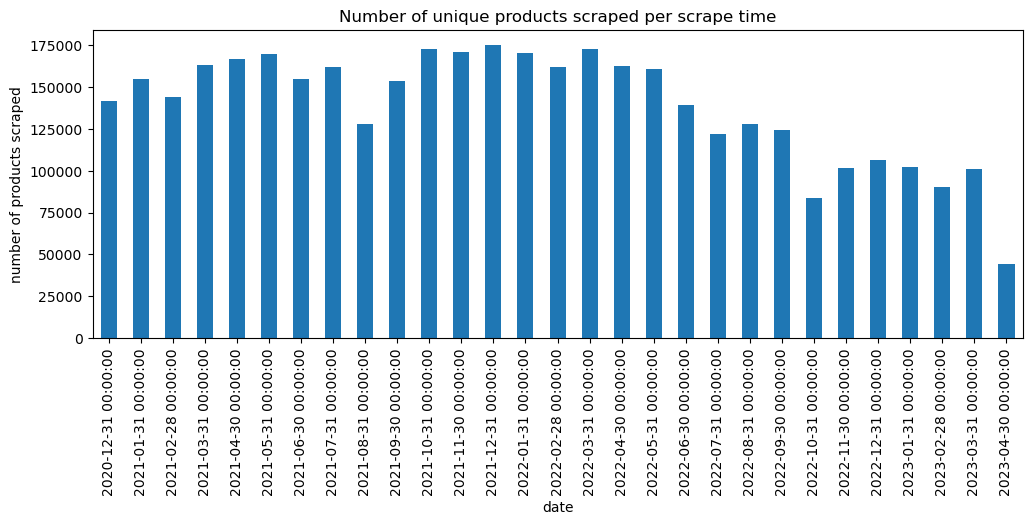

In [97]:
df_scrapes.plot(
    kind='bar',
    figsize=(12,4),
    title="Number of unique products scraped per scrape time",
    legend=False)
plt.ylabel("number of products scraped")
plt.show()
